<a href="https://colab.research.google.com/github/hufsaim/T03108701/blob/main/ch4/ch04_03_least_squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Least Squares Approximation
- 측정데이터 (t,b)에 대한 1차 함수 b = C + Dt 를 least squares approximation을 통하여 구해보는 실습입니다.
- 우리는 projection을 통해 least squares error를 최소로 만들어 주는 (C, D)를 구할 수가 있습니다.
- 주어진 데이터쌍 (t,b)로부터 linear equation Ax = b 를 구성하고, least squares error를 최소로 만드는 vector p 를 만들어주는 x를 구합니다.







In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- 실습에 사용하기 위한 csv파일을 불러와서 data를 관찰합니다.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/hufsbme/T03108701/master/ch4/headbrain.csv')
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


- t, b에 data의 column을 입력하고, plot을 하여 t와 b의 관계를 관찰합니다.

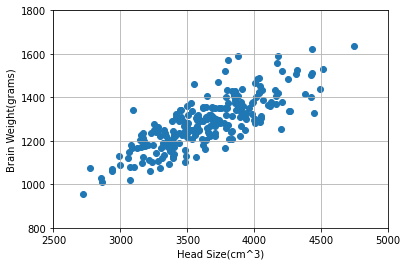

In [57]:
t = data.iloc[:,2]
b = data.iloc[:,3]
plt.scatter(t,b)
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
plt.xlim([2500,5000])
plt.ylim([800,1800])
plt.grid(True)
plt.show()

- b vector의 shape을 확인합니다.

In [80]:
b=np.array(b)
b=b.reshape((len(b),1))
print(b.shape)

(237, 1)


- matrix A를 정의합니다. A의 첫 번째 column은 모두 1이 되게 하고, 두 번째 column은 t를 넣도록 합니다. 
- A의 shape을 확인해 봅니다.

In [81]:
A = np.ones([len(data),2])
A[:,1] = t
print(A.shape)

(237, 2)


- Matrix A가 제대로 구성되었는지 확인해봅니다.

In [82]:
print('A=')
print(A)

A=
[[1.000e+00 4.512e+03]
 [1.000e+00 3.738e+03]
 [1.000e+00 4.261e+03]
 [1.000e+00 3.777e+03]
 [1.000e+00 4.177e+03]
 [1.000e+00 3.585e+03]
 [1.000e+00 3.785e+03]
 [1.000e+00 3.559e+03]
 [1.000e+00 3.613e+03]
 [1.000e+00 3.982e+03]
 [1.000e+00 3.443e+03]
 [1.000e+00 3.993e+03]
 [1.000e+00 3.640e+03]
 [1.000e+00 4.208e+03]
 [1.000e+00 3.832e+03]
 [1.000e+00 3.876e+03]
 [1.000e+00 3.497e+03]
 [1.000e+00 3.466e+03]
 [1.000e+00 3.095e+03]
 [1.000e+00 4.424e+03]
 [1.000e+00 3.878e+03]
 [1.000e+00 4.046e+03]
 [1.000e+00 3.804e+03]
 [1.000e+00 3.710e+03]
 [1.000e+00 4.747e+03]
 [1.000e+00 4.423e+03]
 [1.000e+00 4.036e+03]
 [1.000e+00 4.022e+03]
 [1.000e+00 3.454e+03]
 [1.000e+00 4.175e+03]
 [1.000e+00 3.787e+03]
 [1.000e+00 3.796e+03]
 [1.000e+00 4.103e+03]
 [1.000e+00 4.161e+03]
 [1.000e+00 4.158e+03]
 [1.000e+00 3.814e+03]
 [1.000e+00 3.527e+03]
 [1.000e+00 3.748e+03]
 [1.000e+00 3.334e+03]
 [1.000e+00 3.492e+03]
 [1.000e+00 3.962e+03]
 [1.000e+00 3.505e+03]
 [1.000e+00 4.315e+03]
 [1.000e

- Vector b가 제대로 구성되었는지 확인해 봅니다.

In [83]:
print('b=')
print(b)

b=
[[1530]
 [1297]
 [1335]
 [1282]
 [1590]
 [1300]
 [1400]
 [1255]
 [1355]
 [1375]
 [1340]
 [1380]
 [1355]
 [1522]
 [1208]
 [1405]
 [1358]
 [1292]
 [1340]
 [1400]
 [1357]
 [1287]
 [1275]
 [1270]
 [1635]
 [1505]
 [1490]
 [1485]
 [1310]
 [1420]
 [1318]
 [1432]
 [1364]
 [1405]
 [1432]
 [1207]
 [1375]
 [1350]
 [1236]
 [1250]
 [1350]
 [1320]
 [1525]
 [1570]
 [1340]
 [1422]
 [1506]
 [1215]
 [1311]
 [1300]
 [1224]
 [1350]
 [1335]
 [1390]
 [1400]
 [1225]
 [1310]
 [1560]
 [1330]
 [1222]
 [1415]
 [1175]
 [1330]
 [1485]
 [1470]
 [1135]
 [1310]
 [1154]
 [1510]
 [1415]
 [1468]
 [1390]
 [1380]
 [1432]
 [1240]
 [1195]
 [1225]
 [1188]
 [1252]
 [1315]
 [1245]
 [1430]
 [1279]
 [1245]
 [1309]
 [1412]
 [1120]
 [1220]
 [1280]
 [1440]
 [1370]
 [1192]
 [1230]
 [1346]
 [1290]
 [1165]
 [1240]
 [1132]
 [1242]
 [1270]
 [1218]
 [1430]
 [1588]
 [1320]
 [1290]
 [1260]
 [1425]
 [1226]
 [1360]
 [1620]
 [1310]
 [1250]
 [1295]
 [1290]
 [1290]
 [1275]
 [1250]
 [1270]
 [1362]
 [1300]
 [1173]
 [1256]
 [1440]
 [1180]
 [130

- matrix A의 transpose matrix를 계산합니다.

In [63]:
AT = A.transpose()
AT.shape

(2, 237)

- matrix A의 transpose와 matrix A를 곱한 결과를 ATA로 정의합니다.

In [64]:
ATA = np.matmul(AT,A)
print('shape of ATA:',ATA.shape)
print('ATA=')
print(ATA)

shape of ATA: (2, 2)
ATA=
[[2.37000000e+02 8.61256000e+05]
 [8.61256000e+05 3.16128319e+09]]


- ATA의 inverse matrix를 구합니다.

In [65]:
ATA_inv = np.linalg.inv(ATA)
print('ATA_inv=')
print(ATA)

ATA_inv=
[[2.37000000e+02 8.61256000e+05]
 [8.61256000e+05 3.16128319e+09]]


- inverse matrix의 정의를 통하여 inverse matrix가 제대로 구하여졌는지 확인해 봅니다.
- Nondiagonal element들이 정확히 0이 되지 않는 이유는?

In [66]:
print(np.matmul(ATA,ATA_inv))

[[ 1.00000000e+00  3.18982020e-18]
 [-6.86679168e-11  1.00000000e+00]]


In [67]:
print(np.matmul(ATA_inv,ATA))

[[ 1.00000000e+00  1.70188358e-11]
 [-3.74907370e-18  1.00000000e+00]]


- least squares error를 최소로 만들어주는 x를 구합니다. 

In [68]:
x = np.matmul(ATA_inv, np.matmul(AT,b))
print(x)

[3.25573421e+02 2.63429339e-01]


- b = C + Dt 의 C를 x로부터 얻어낼 수 있습니다.

In [69]:
C = x[0]
D = x[1]
print('C=',C)
print('D=',D)

C= 325.5734210494587
D= 0.26342933948939395


- Projection vector p는 x에 A를 곱하여 얻을 수 있습니다.
- Error vector는 b에서 p를 빼주어 구합니다.

In [70]:
p = np.matmul(A,x)
e = b - p
print(E)

[[  15.83339917]
 [ -13.27229206]
 [-113.04583661]
 [ -38.5460363 ]
 [ 164.0822279 ]
 [  30.03239688]
 [  77.34652898]
 [  -8.11844029]
 [  77.65637538]
 [   0.4509491 ]
 [ 107.43936309]
 [   2.55322637]
 [  70.54378321]
 [  87.91591838]
 [-127.03464997]
 [  58.37445909]
 [ 111.21417876]
 [  53.38048828]
 [ 199.11277323]
 [ -90.98481895]
 [   9.84760041]
 [-104.40852862]
 [ -52.65862847]
 [ -32.89627056]
 [  58.92750439]
 [  14.27861039]
 [ 101.22576477]
 [  99.91377552]
 [  74.54164035]
 [  -5.39091342]
 [  -5.1803297 ]
 [ 106.44880625]
 [ -42.42400097]
 [ -16.70290266]
 [  11.08738535]
 [-123.29292186]
 [ 120.31129857]
 [  37.09341454]
 [  32.15316109]
 [   4.53132545]
 [ -19.28046411]
 [  71.10674404]
 [  62.72897905]
 [ 242.34137153]
 [  -3.2009595 ]
 [  33.75262345]
 [  45.57298443]
 [  55.67271947]
 [  26.28035387]
 [  14.49006585]
 [-126.576981  ]
 [  25.23909427]
 [-115.41670067]
 [  -5.88682739]
 [  17.54806892]
 [ -11.512077  ]
 [ -40.31355166]
 [ 136.97995064]
 [ -32.1678719

- Projection vector를 plot하여 data를 잘 표현하는 1차함수가 만들어졌는지 확인해봅니다.

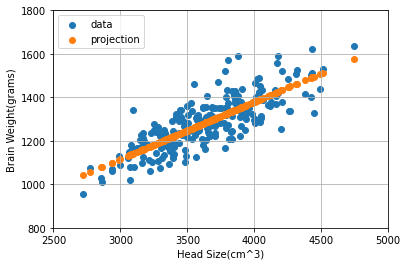

In [77]:
plt.scatter(t,b)
plt.scatter(t,p)
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
plt.xlim([2500,5000])
plt.ylim([800,1800])
plt.grid(True)
plt.legend(['data','projection'])
plt.show()

- Error vector를 plot하여 각각의 data에 대한 error의 정도를 확인해 볼 수 있습니다.

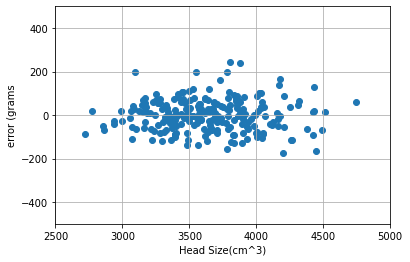

In [76]:
plt.scatter(t,e)
plt.xlabel(data.columns[2])
plt.ylabel('error (grams)')
plt.xlim([2500,5000])
plt.ylim([-500,500])
plt.grid(True)
plt.show()

- 지금까지의 과정을 numpy에서 제공하는 lstsq함수를 이용해 한 번에 구해볼 수도 있습니다.

In [85]:
x =np.linalg.lstsq(A,b) # least squares solution
C = x[0][0]
D = x[0][1]
print('C=',C)
print('D=',D)

C= [325.57342105]
D= [0.26342934]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.
